# AlertAI - Algorithms 
This notebook is responsible for the development the algorithms that will detect the anomalies in the data.
Last task of the pipeline of AlertAI component in RideCare Project.

#### by PEILoad

### The steps of this task are:
1. Import Required Libraries 
2. Acquire the Data
3. Supervised Learning

    3.1 Algorithm A

            a. Data preparation for the input

            b. Model Training

            c. Output results

4. Unsupervised Learning

    4.1 Algorithm B

            a. Data preparation for the input

            b. Model Training

            c. Output results

5. Model Export
6. Conclusions and Validation

## 1. Import Libraries
This section, as name says, is destined to import the libraries that will be used in the file.

In [2]:
import keras
from keras import layers
from keras.utils import np_utils, get_file
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor, IsolationForest

Using TensorFlow backend.


## 2. Data Acquisition
Step corresponding to gather the Data in order to manipulate it later on.

In [3]:
data = pd.read_csv("data/data.csv")

X = data[['sensors.pm25','sensors.pm10','sensors.temperature', 'sensors.gas', 'sensors.humidity', 'sensors.pressure']]
y = data[['sensors.classification']]

print(X.shape)
print(y.shape)

#sklearn para dividir os dados de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123) #shuffle=true by default

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1973, 6)
(1973, 1)
(1381, 6)
(592, 6)
(1381, 1)
(592, 1)


(1530, 13)
(532, 13)


<function matplotlib.pyplot.show(*args, **kw)>

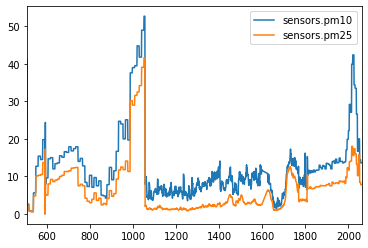

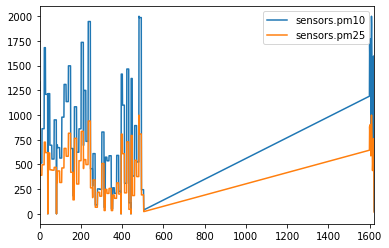

In [29]:
#Observação de dados
x0 = data.loc[data['sensors.classification'] == 0]
x1 = data.loc[data['sensors.classification'] == 1]

print(x0.shape)
print(x1.shape)

x0.plot(y=["sensors.pm10", "sensors.pm25"])
plt.show

x1.plot(y=["sensors.pm10", "sensors.pm25"])
plt.show

## 3. Supervised Learning
Where the "magic" happens!
Section where the data will be cleaned and ready to fill de model.

### 3.1 Algoritmo "SVM (Support Vector Machine)"

#### SVM (Best Kernel)

In [9]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=6, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

for i in range(4):
    model = getClassifier(i)
    model.fit(X_train, y_train.values.ravel())
    y_pred_test = model.predict(X_test)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred_test))


Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       451
           1       0.24      1.00      0.38       141

    accuracy                           0.24       592
   macro avg       0.12      0.50      0.19       592
weighted avg       0.06      0.24      0.09       592

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       451
           1       0.00      0.00      0.00       141

    accuracy                           0.76       592
   macro avg       0.38      0.50      0.43       592
weighted avg       0.58      0.76      0.66       592

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       451
           1       0.00      0.00      0.00       141

    accuracy                           0.76       592
   macro avg       0.38      0.50      0.43     

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### SVM Parameter Tuning - GridSearch

In [10]:
#Grid Search
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf','sigmoid','linear']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train.values.ravel())
print("GRID SEARCH")
print(grid.best_estimator_)
grid_pred = grid.predict(X_test)
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))
print(grid.best_params_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ..........

[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV] ................... C=1, gamma=0.01, kernel=linear, total=   0.2s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .

[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=100, gamma=0.1, kernel=linear .................................
[CV] .................. C=100, gamma=0.1, kernel=linear, total=   0.2s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    9.7s finished


#### a. Data preparation for input

#### b. Model Trainig

In [11]:
#SVC - Support Vector Classifier class (Scikit-Learn's svm library).
#Polinomial 'poly & degree', Gaussian Kernel 'rbf', Sigmoid Kernel 'sigmoid', Linear 'linear'
model = SVC(kernel = 'linear')
model.fit(X_train, y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### c. Output results

In [12]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 

In [13]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall: 1.0
[[451   0]
 [  0 141]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592



#### d. Model Saving 

In [14]:
import pickle

#SVM with best result
filename = 'model_saves/svm.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)


#GridSearch
filename = 'model_saves/svm_gridsearch.sav'
pickle.dump(grid, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print("Grid Search: ",result)


1.0
Grid Search:  1.0


### 3.2 Algoritmo "Neural Networks"
Nota: Versão muito muito simples e inicial

#### a. Data preparation for input

In [18]:
num_classes = 1 # Number of classes right now (0-Normal,1-smoke)
y_train_nn = np.asarray(y_train)
y_test_nn = np.asarray(y_test)
print(X_train.shape)

(1381, 6)


#### b. Model Train and Results

In [19]:
# Model Build
nn = keras.Sequential()

nn.add(layers.Dense(128,input_dim=X_train.shape[1],activation='relu'))
nn.add(layers.Dense(16,input_dim=X_train.shape[1],activation='relu'))
nn.add(layers.Dense(num_classes,activation='sigmoid'))

# Model Compile
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.build()

# Model Summary
print(nn.summary())

# Model Training 
epochs = 20
batch_size = 16
nn.fit(X_train, y_train_nn, validation_data = (X_test, y_test_nn), epochs = epochs, verbose = 2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 2,977
Trainable params: 2,977
Non-trainable params: 0
_________________________________________________________________
None
Train on 1381 samples, validate on 592 samples
Epoch 1/20
 - 0s - loss: 217.7390 - accuracy: 0.7386 - val_loss: 19.3796 - val_accuracy: 0.8514
Epoch 2/20
 - 0s - loss: 5.5271 - accuracy: 0.9305 - val_loss: 2.5040 - val_accuracy: 0.9662
Epoch 3/20
 - 0s - loss: 1.7701 - accuracy: 0.9566 - val_loss: 2.5126 - val_accuracy: 0.9679
Epoch 4/20
 - 0s - loss: 2.5400 - accuracy: 0.94

In [20]:
y_preds = nn.predict(X_test)
print(y_preds.round())

[[1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.

In [21]:
print("Metrics - Test data")
print("Accuracy: ", metrics.accuracy_score(y_test, y_preds.round()))
print("Precision: ",metrics.precision_score(y_test, y_preds.round()))
print(confusion_matrix(y_test, y_preds.round()))
print(classification_report(y_test, y_preds.round()))

Metrics - Test data
Accuracy:  0.9864864864864865
Precision:  0.9463087248322147
[[443   8]
 [  0 141]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       451
           1       0.95      1.00      0.97       141

    accuracy                           0.99       592
   macro avg       0.97      0.99      0.98       592
weighted avg       0.99      0.99      0.99       592



#### b. Model Train and Results - sklearn

In [22]:
model = MLPClassifier(hidden_layer_sizes=(6,6,6), activation='relu', solver='adam', max_iter=10000)
model.fit(X_train, y_train.values.ravel())

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(y_test)

print(y_pred_test)

      sensors.classification
273                        1
433                        1
277                        1
1691                       0
1186                       0
...                      ...
990                        0
1386                       0
172                        1
1777                       0
850                        0

[592 rows x 1 columns]
[1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0

In [23]:
print("Metrics - Train data")
print("Accuracy: ", metrics.accuracy_score(y_train, y_pred_train))
print("Precision: ",metrics.precision_score(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


print("Metrics - Test data")
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred_test))
print("Precision: ",metrics.precision_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Metrics - Train data
Accuracy:  1.0
Precision:  1.0
[[1039    0]
 [   0  342]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1039
           1       1.00      1.00      1.00       342

    accuracy                           1.00      1381
   macro avg       1.00      1.00      1.00      1381
weighted avg       1.00      1.00      1.00      1381

Metrics - Test data
Accuracy:  1.0
Precision:  1.0
[[451   0]
 [  0 141]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592



#### d. Model Saving 

In [24]:
import pickle

#Neural Network sklearn
filename = 'model_saves/nn_sklearn.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

#Neural Network implementada
filename = 'model_saves/nn.sav'
pickle.dump(nn, open(filename, 'wb'))

1.0


### 3.3 Algoritmo "Naive Bayes"

#### a. Data preparation for input

#### b. Model Trainig

In [25]:
model = GaussianNB()
model.fit(X_train, y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

#### c. Output results

In [26]:
y_pred_test = model.predict(X_test)
print(y_pred)

[1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 

In [27]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy: 0.9780405405405406
[[438  13]
 [  0 141]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       451
           1       0.92      1.00      0.96       141

    accuracy                           0.98       592
   macro avg       0.96      0.99      0.97       592
weighted avg       0.98      0.98      0.98       592



#### d. Model Saving 

In [28]:
import pickle

filename = 'model_saves/naivebayes.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9780405405405406


### 3.4 Algoritmo "Decision Trees/Random Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [29]:
#Utlizando o modelo Random Forest
from sklearn.ensemble import RandomForestRegressor

#Instanciar o modelo com x decision trees
model = RandomForestRegressor(n_estimators = 50, random_state = 0) #random_state: "the results will be the same each time I run the split for reproducible results"

#Treinar o modelo
model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

#### c. Output results

In [30]:
#Fazer previsões
y_pred_test = model.predict(X_test)
print(y_pred_test)
print(y_pred_test.round())

[1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

print(confusion_matrix(y_test,y_pred_test.round()))
print(classification_report(y_test,y_pred_test.round()))
print(accuracy_score(y_test, y_pred_test.round()))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
[[451   0]
 [  0 141]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       451
           1       1.00      1.00      1.00       141

    accuracy                           1.00       592
   macro avg       1.00      1.00      1.00       592
weighted avg       1.00      1.00      1.00       592

1.0


#### d. Model Saving 

In [32]:
import pickle

filename = 'model_saves/randomforest.sav'
pickle.dump(model, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

1.0


## 4. Unsupervised Learning
Nota: Nestes casos não existe 'classificação' por serem modelos não supervisionados

### 4.1 Algoritmo "K-means clustering"

#### a. Data preparation for input

#### b. Model Trainig

In [37]:
n_clusters = 2

model = KMeans(algorithm = 'auto', init = 'k-means++', max_iter = 10000, n_init= 10, n_clusters = n_clusters, verbose = 0) #Para já vou colocar 2, de existência e não existência de fumo
model.fit(X_train)
y_labels_train = model.labels_
y_labels_test = model.predict(X_test)

#### c. Output results

In [34]:
print(y_labels_test)
print(y_labels_train)

[0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1
 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0
 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0
 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0
 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1
 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 

[0 1 0 ... 0 0 1]
[[2.63228758e+01 5.39124183e+01 1.90760082e+01 5.79654536e+04
  5.20362909e+01 9.82489199e+02]
 [2.51155519e+02 4.55648701e+02 2.07922923e+01 2.85971737e+04
  5.17678703e+01 1.00674715e+03]]


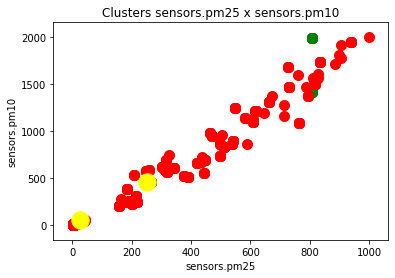

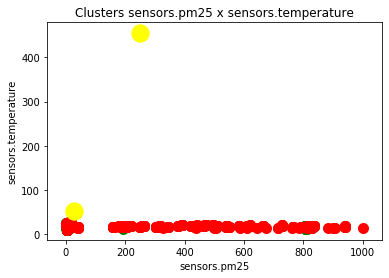

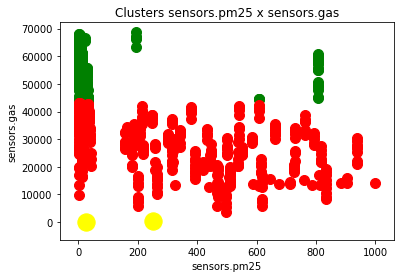

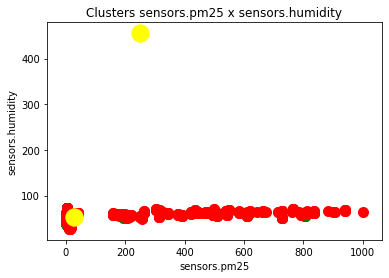

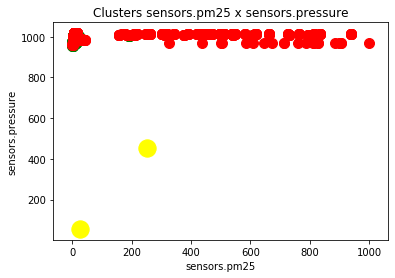

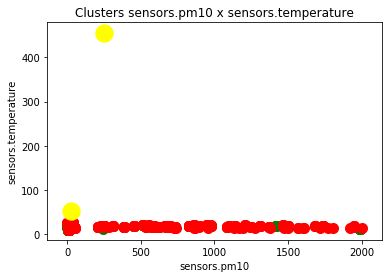

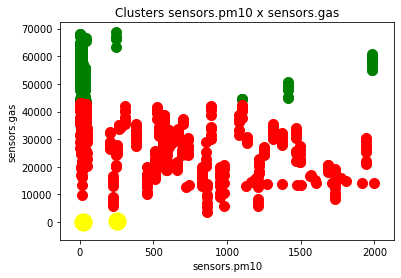

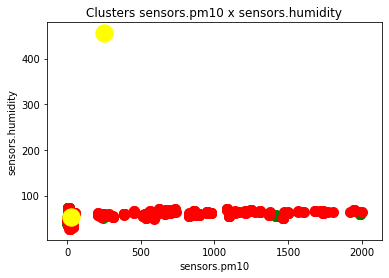

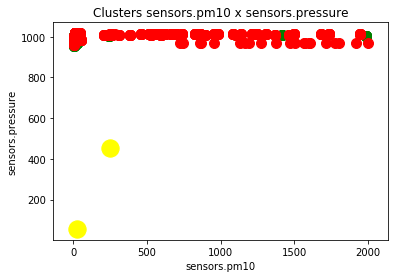

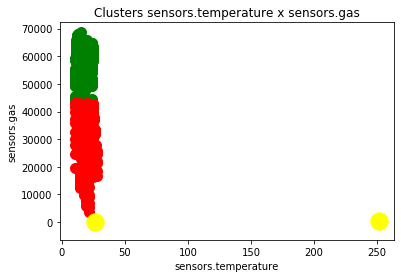

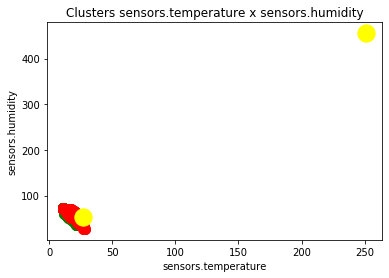

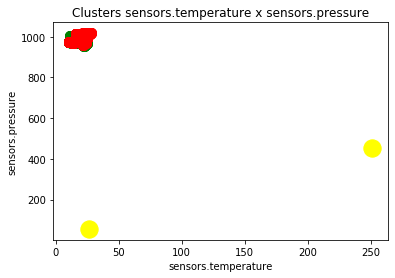

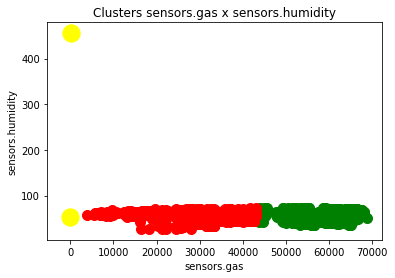

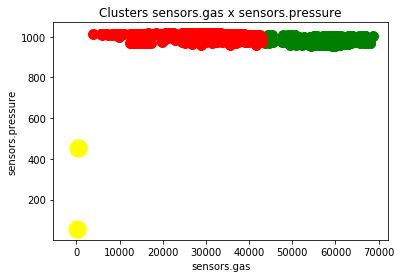

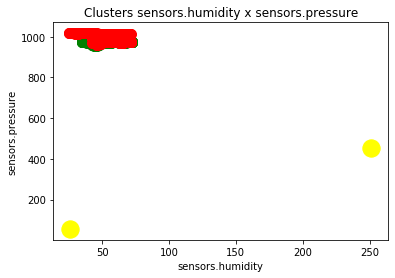

In [38]:
print(model.labels_) #prever a que cluster cada ponto pertence
print(model.cluster_centers_) #para ver onde é o centro de cada cluster

#Labels
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        if( c1 >= c2):
            ;
        else:
            plt.scatter(X_train[model.labels_ == 0][col1], X_train[model.labels_ == 0][col2], s = 100, c = 'green', label = 'Cluster 0')
            plt.scatter(X_train[model.labels_ == 1][col1], X_train[model.labels_ == 1][col2], s = 100, c = 'red', label = 'Cluster 1')
            plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
            plt.title('Clusters ' + str(col1) + ' x ' + str(col2))
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()

In [39]:
#Métricas para os dados de treino (X_train)
print("Accuracy:", metrics.accuracy_score(y_train, y_labels_train))
print(confusion_matrix(y_train, y_labels_train))
print(classification_report(y_train, y_labels_train))

#Métricas aplicadas aos dados de teste (X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_labels_test))
print(confusion_matrix(y_test, y_labels_test))
print(classification_report(y_test, y_labels_test))

Accuracy: 0.7653874004344677
[[740 299]
 [ 25 317]]
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      1039
           1       0.51      0.93      0.66       342

    accuracy                           0.77      1381
   macro avg       0.74      0.82      0.74      1381
weighted avg       0.86      0.77      0.78      1381

Accuracy: 0.777027027027027
[[328 123]
 [  9 132]]
              precision    recall  f1-score   support

           0       0.97      0.73      0.83       451
           1       0.52      0.94      0.67       141

    accuracy                           0.78       592
   macro avg       0.75      0.83      0.75       592
weighted avg       0.86      0.78      0.79       592



#### d. Model Saving 

In [40]:
import pickle

filename = 'model_saves/kmeans.sav'
pickle.dump(model, open(filename, 'wb'))

### 4.2 Algoritmo "Local Outlier factor"

#### a. Data preparation for input

#### b. Model Trainig

In [41]:
n_neighbors = 20 #no sklearn diz que 20 é no geral um valor bom, mas podemos otimizar depois
metric = 'manhattan' #Euclid, Minkowski, Manhattan

model = LocalOutlierFactor(n_neighbors = n_neighbors, metric = metric, contamination = 0.1)
y_pred_train = model.fit_predict(X_train)
X_scores = model.negative_outlier_factor_ #Negative LOF score
y_pred_test = model.fit_predict(X_test)

#### c. Output results

[-0.99909892 -0.98722144 -0.99902645 ... -1.13917668 -1.25613489
 -1.10058836]
[1 1 1 ... 1 1 1]
----------------------------------------
(array([  23,   24,   32,   39,   44,   49,   61,   64,   74,   78,   92,
         93,  117,  133,  134,  146,  149,  155,  165,  190,  192,  207,
        208,  209,  224,  225,  228,  252,  255,  256,  260,  261,  265,
        274,  291,  298,  310,  334,  336,  363,  373,  375,  381,  412,
        428,  431,  436,  444,  445,  447,  457,  458,  471,  472,  491,
        496,  511,  536,  540,  547,  563,  568,  577,  584,  588,  599,
        608,  613,  645,  646,  658,  679,  685,  722,  724,  725,  729,
        735,  751,  770,  775,  778,  780,  784,  790,  796,  806,  822,
        832,  833,  834,  881,  882,  901,  916,  926,  949,  953,  956,
        981, 1000, 1003, 1006, 1016, 1019, 1030, 1031, 1041, 1048, 1074,
       1089, 1094, 1106, 1111, 1134, 1145, 1150, 1154, 1155, 1158, 1160,
       1170, 1210, 1211, 1220, 1240, 1256, 1271, 1289, 129

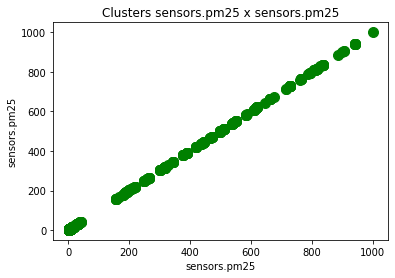

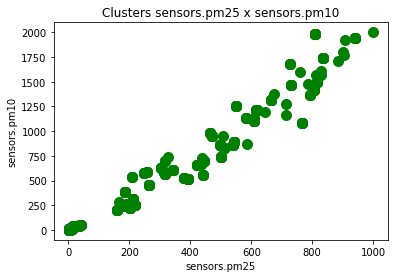

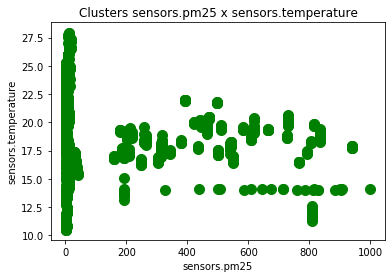

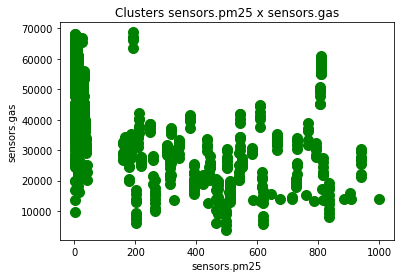

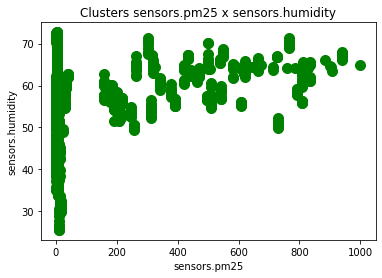

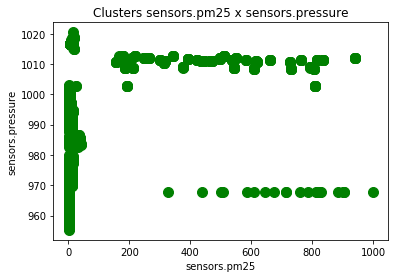

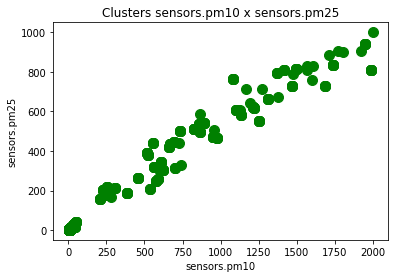

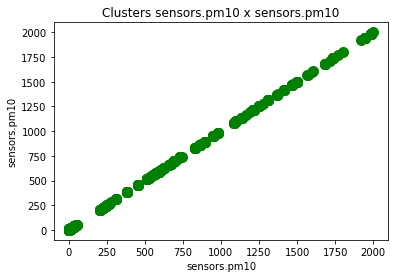

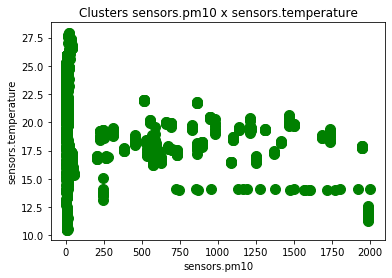

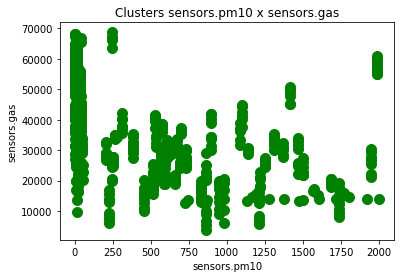

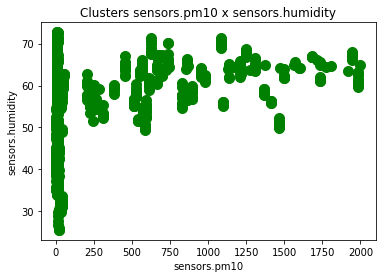

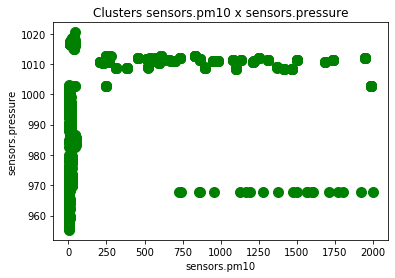

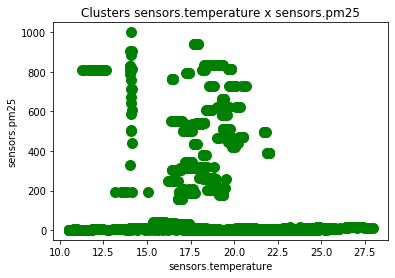

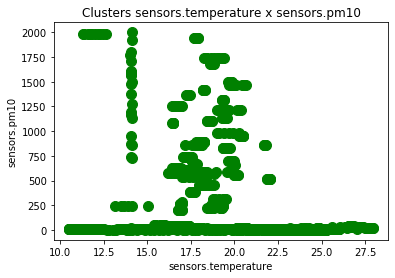

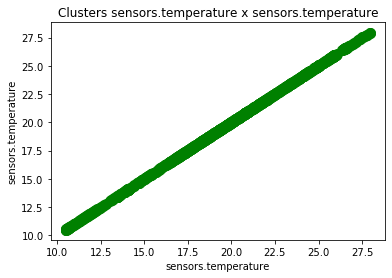

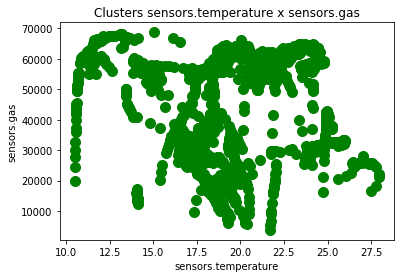

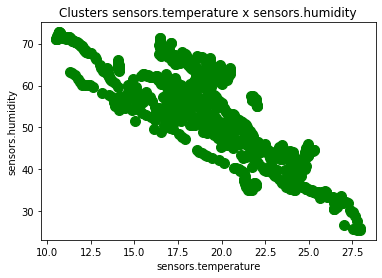

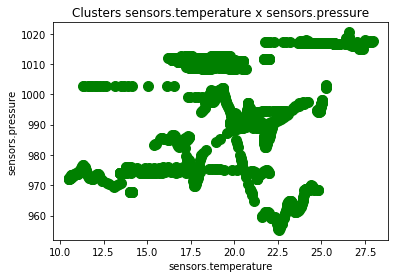

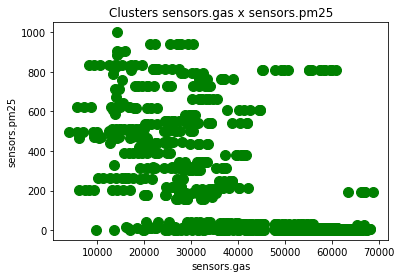

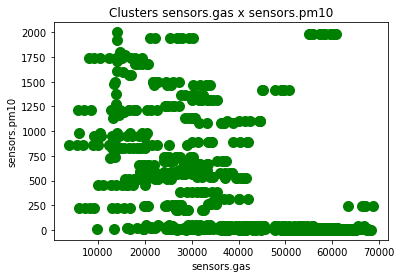

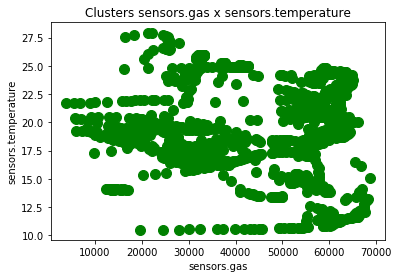

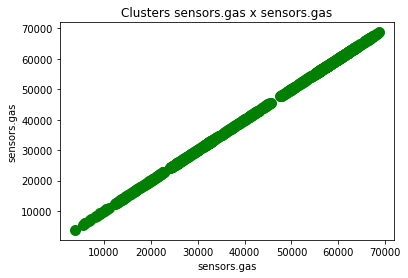

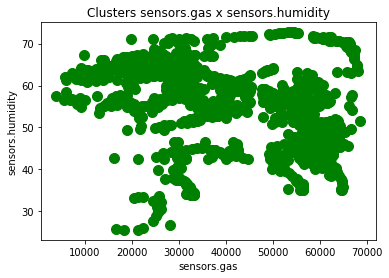

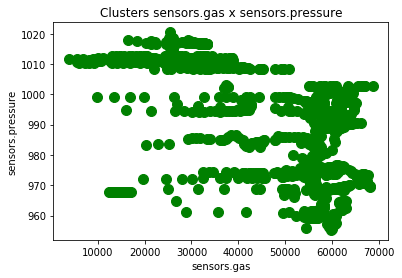

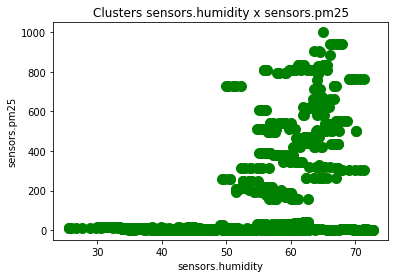

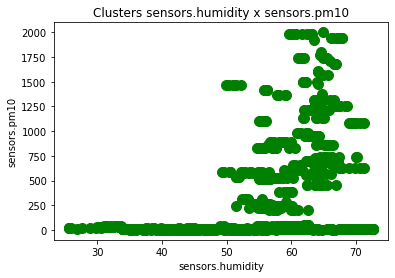

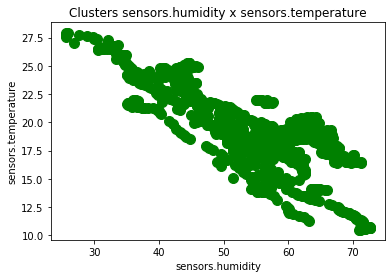

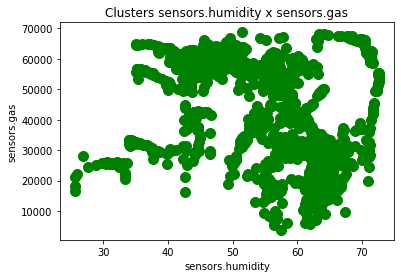

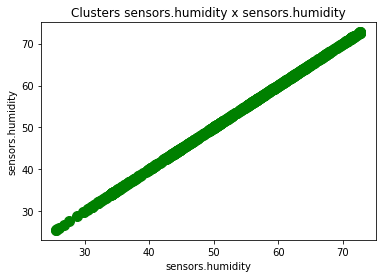

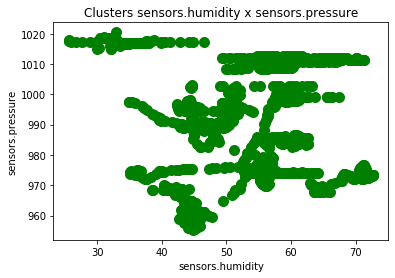

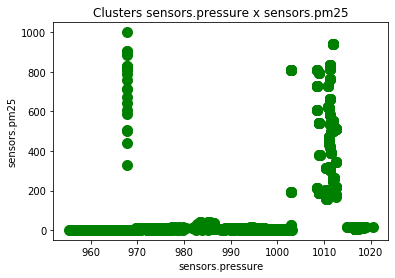

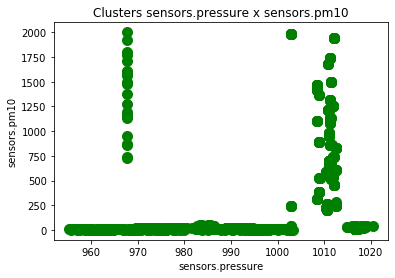

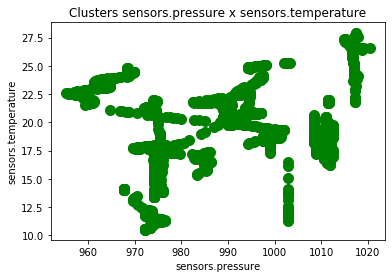

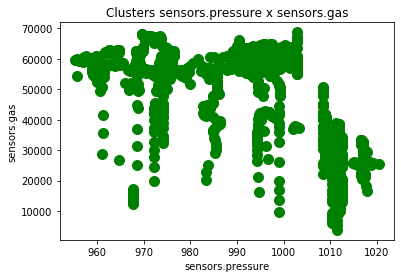

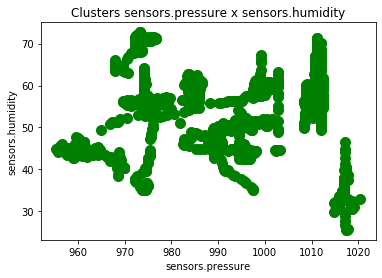

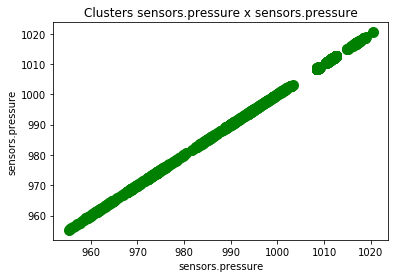

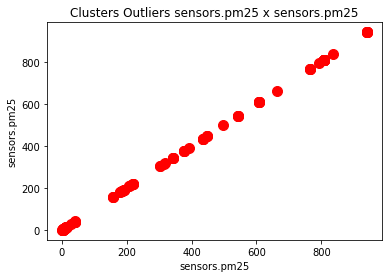

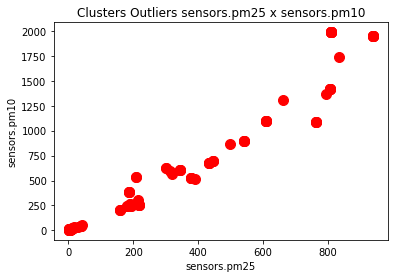

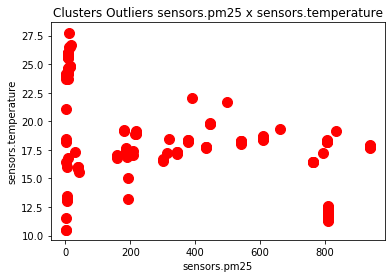

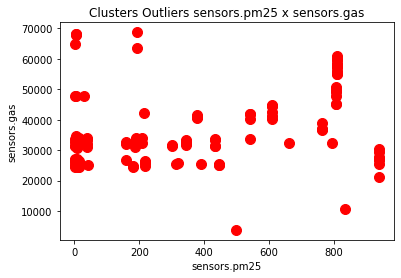

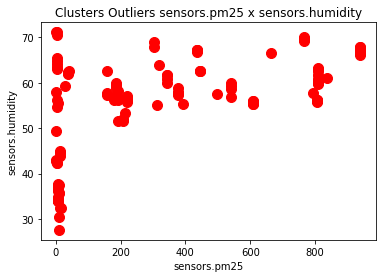

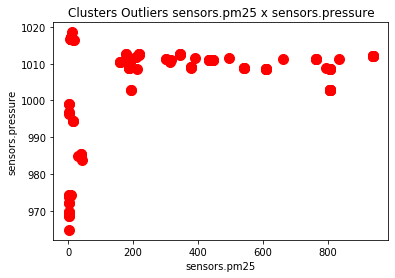

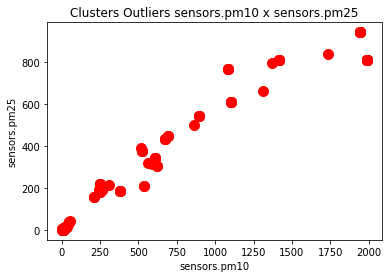

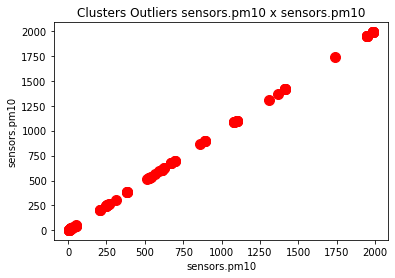

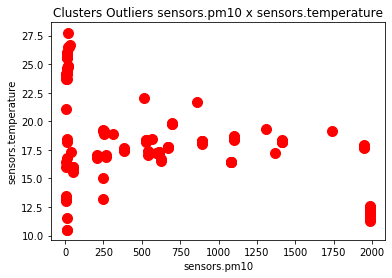

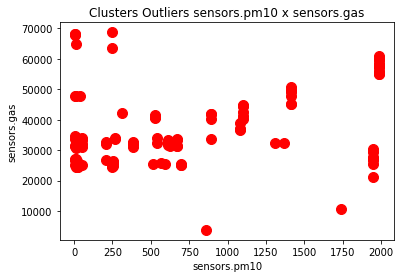

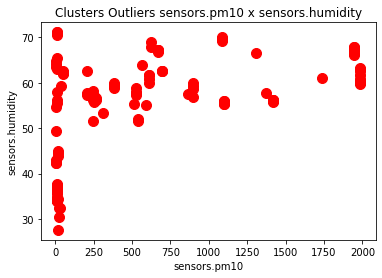

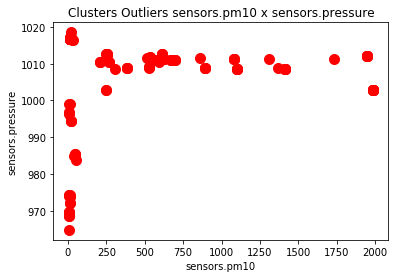

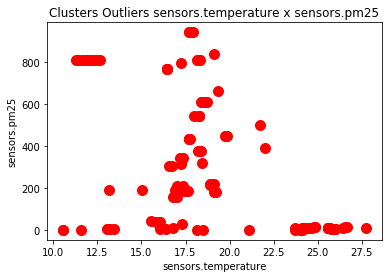

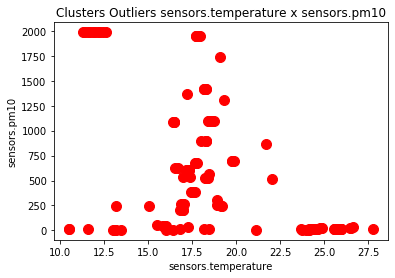

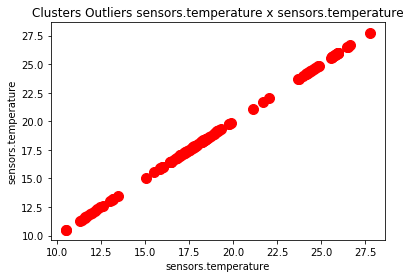

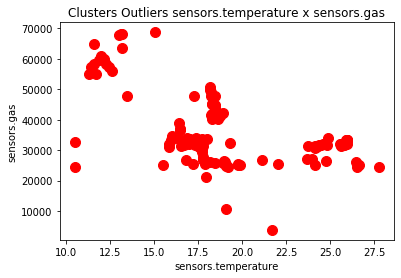

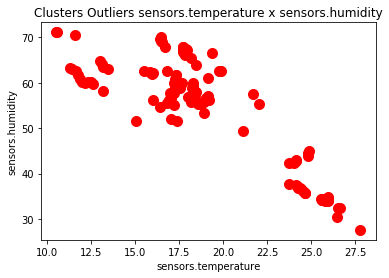

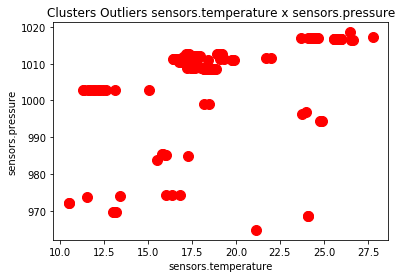

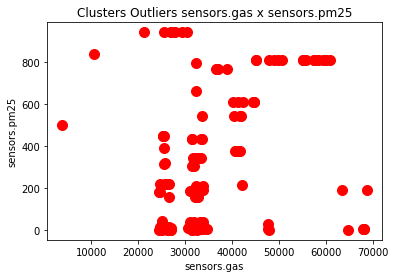

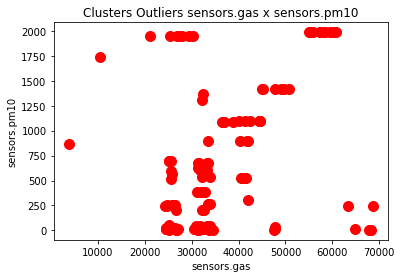

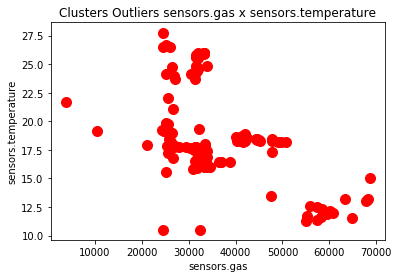

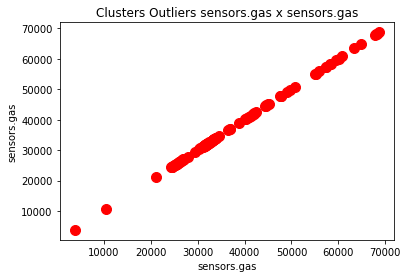

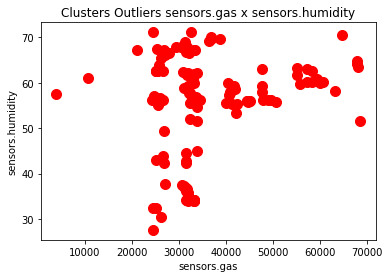

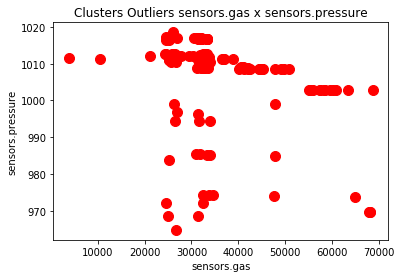

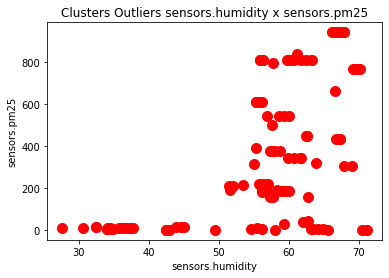

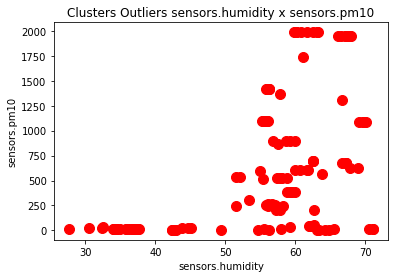

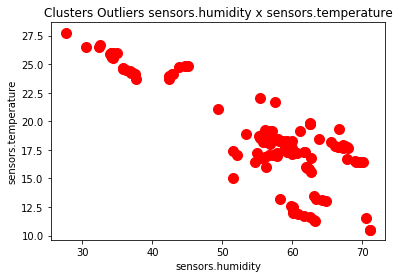

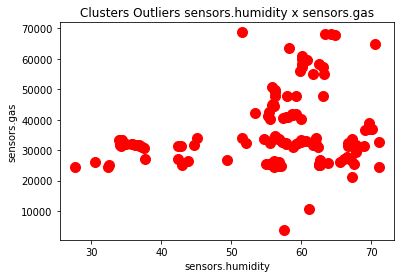

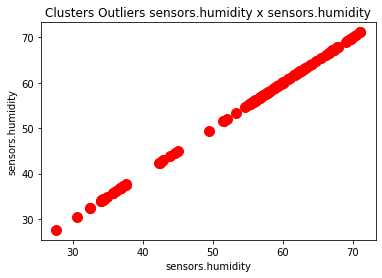

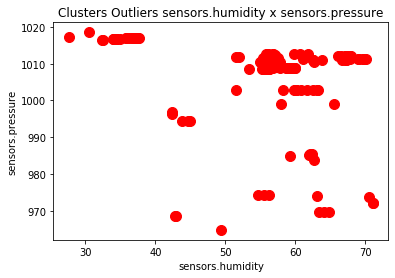

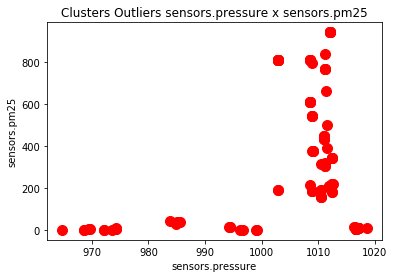

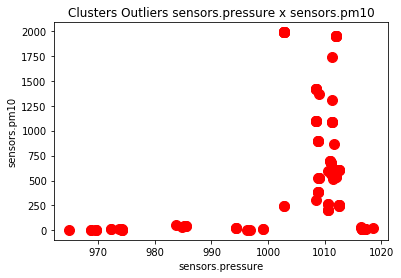

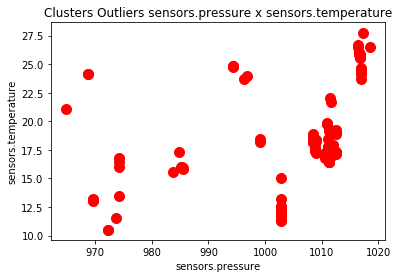

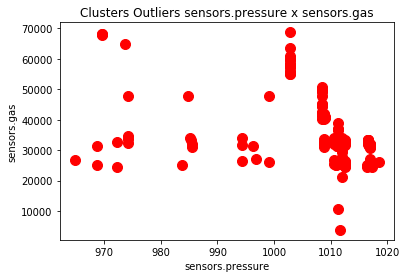

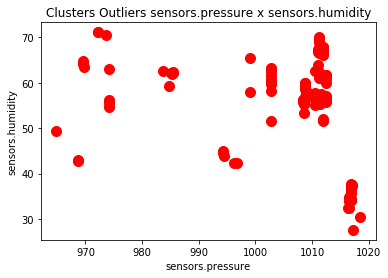

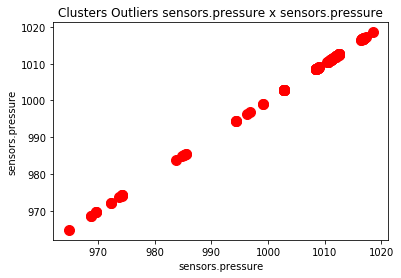

In [42]:
#Notas:
#LOF(k) ~ 1 means Similar density as neighbors.
#LOF(k) < 1 means Higher density than neighbors (Inlier/not an outlier).
#LOF(k) > 1 means Lower density than neighbors (Outlier)

print(X_scores)
print(y_pred_train) #1 - inlier / -1 outlier

#Filtro dos outliers (valores negativos)
outlier_index = np.where(y_pred_train == -1)
outlier_values = X_train.iloc[outlier_index]
print("----------------------------------------")
print(outlier_index)
print("----------------------------------------")

#Plot dos dados
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        plt.scatter(X_train[col1], X_train[col2], s = 100, c = 'green', label = 'Cluster dados')
        plt.title('Clusters ' + str(col1) + ' x ' + str(col2))
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

#Plot Outliers Values
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        plt.scatter(outlier_values[col1],outlier_values[col2], s = 100, c = 'r', label = 'Cluster Outliers')
        plt.title('Clusters Outliers ' + str(col1) + ' x ' + str(col2))
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

In [43]:
#Substituição dos valores normais e anomalias por 0 e 1
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train == -1] = 1
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1

print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy: 0.7697320782041999
[[982  57]
 [261  81]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1039
           1       0.59      0.24      0.34       342

    accuracy                           0.77      1381
   macro avg       0.69      0.59      0.60      1381
weighted avg       0.74      0.77      0.73      1381

Accuracy: 0.7516891891891891
[[418  33]
 [114  27]]
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       451
           1       0.45      0.19      0.27       141

    accuracy                           0.75       592
   macro avg       0.62      0.56      0.56       592
weighted avg       0.71      0.75      0.71       592



#### d. Model Saving 

In [44]:
import pickle

filename = 'model_saves/lof.sav'
pickle.dump(model, open(filename, 'wb'))

### 4.3 Algoritmo "Isolation Forest"

#### a. Data preparation for input

#### b. Model Trainig

In [45]:
model = IsolationForest(n_estimators = 100, max_samples = 'auto', contamination = 0.1, max_features = 6, behaviour = 'new')
#n_estimatores = 100 por default; max_features = "It is the number of features to draw from the total features to train each base estimator or tree"
model.fit(X_train)

scores = model.decision_function(X_train)

#### c. Output results

In [46]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print(y_pred_train) #anomalias = -1
print(y_pred_test)

[ 1 -1  1 ...  1  1 -1]
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1

(array([   1,    4,    9,   14,   16,   27,   49,   63,   78,   91,  114,
        117,  118,  133,  154,  179,  192,  198,  207,  208,  226,  229,
        230,  245,  247,  260,  274,  280,  282,  284,  291,  294,  299,
        309,  310,  328,  334,  337,  341,  350,  357,  361,  368,  370,
        375,  381,  410,  412,  426,  428,  431,  442,  444,  447,  449,
        458,  484,  495,  500,  523,  534,  583,  596,  604,  610,  613,
        616,  628,  646,  649,  658,  666,  671,  679,  707,  709,  718,
        725,  729,  748,  751,  765,  770,  793,  807,  810,  811,  822,
        823,  840,  841,  843,  848,  870,  882,  911,  913,  923,  949,
        953,  954,  981,  988,  989, 1000, 1011, 1014, 1022, 1083, 1086,
       1093, 1105, 1107, 1112, 1137, 1143, 1145, 1150, 1154, 1173, 1177,
       1190, 1192, 1204, 1215, 1228, 1246, 1249, 1250, 1256, 1271, 1284,
       1302, 1305, 1308, 1345, 1348, 1380]),)


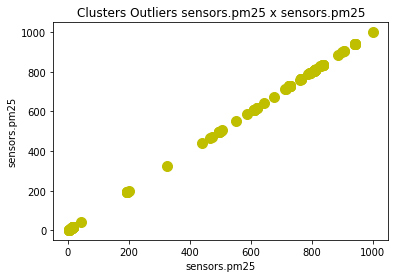

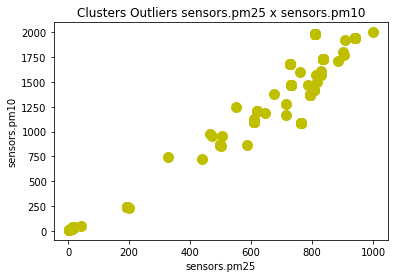

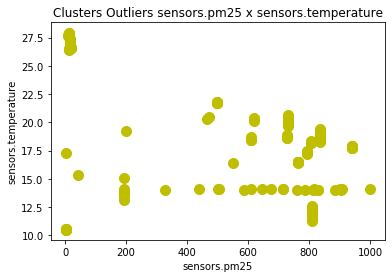

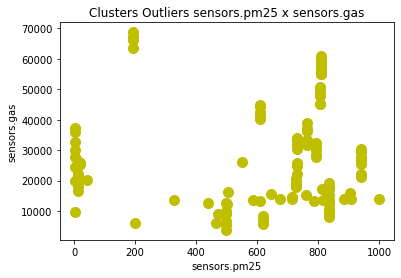

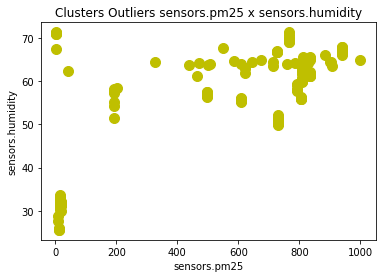

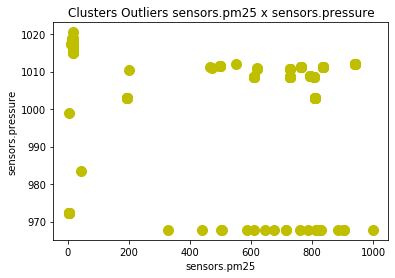

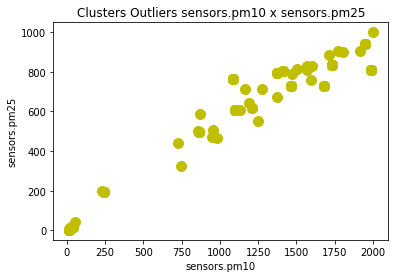

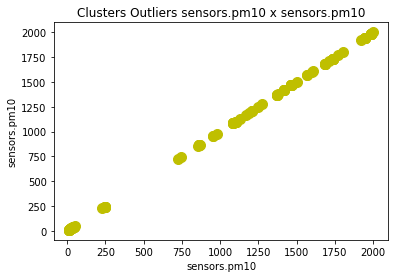

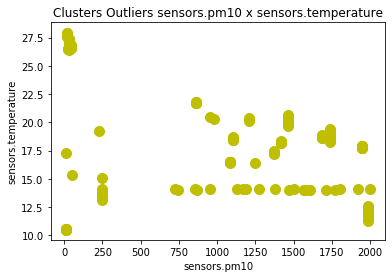

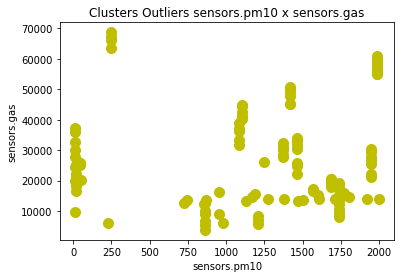

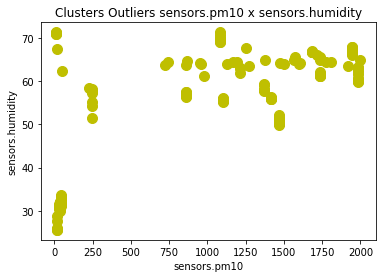

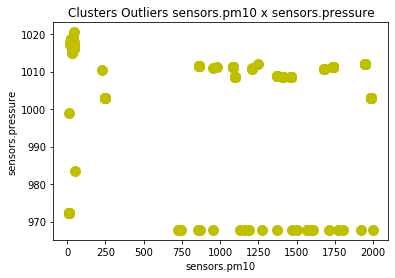

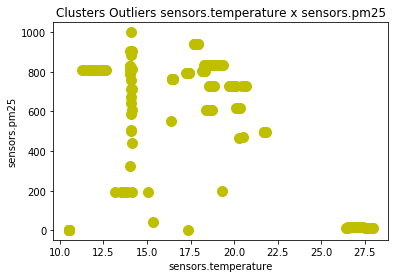

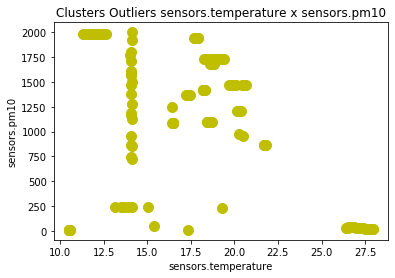

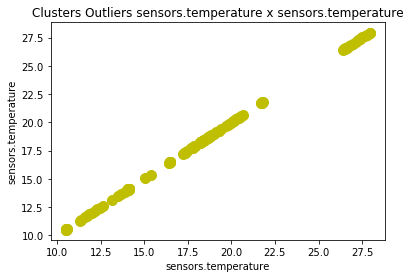

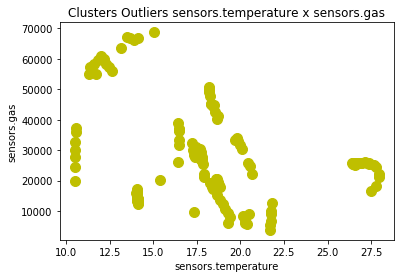

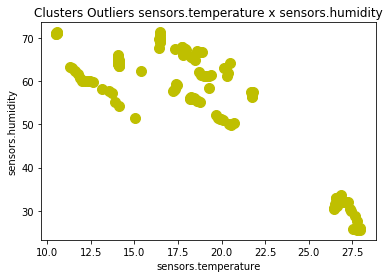

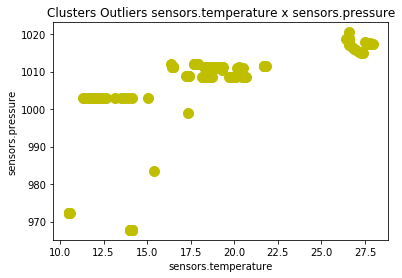

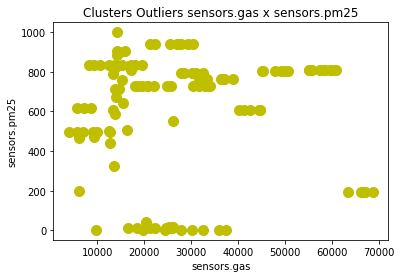

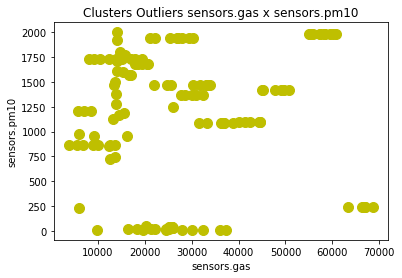

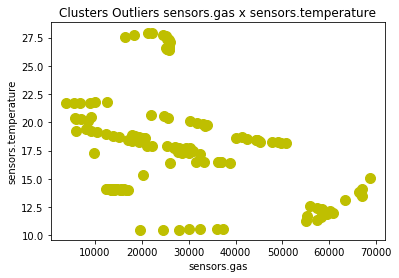

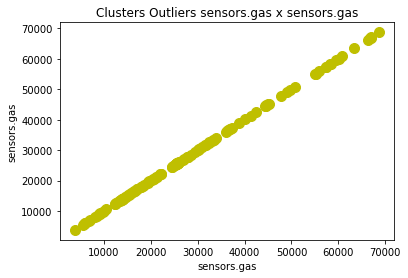

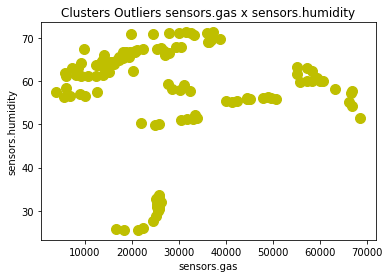

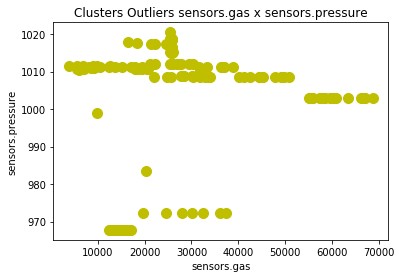

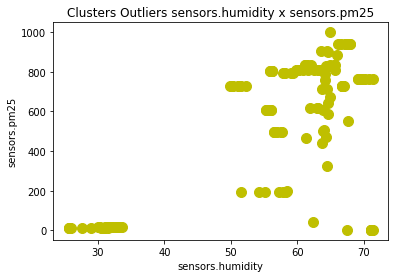

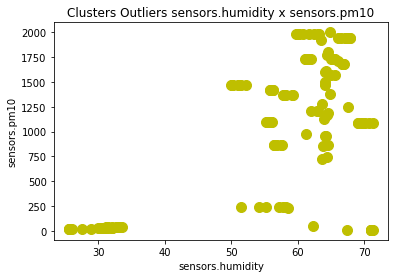

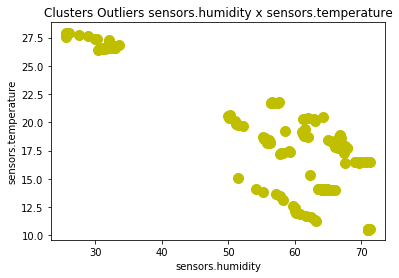

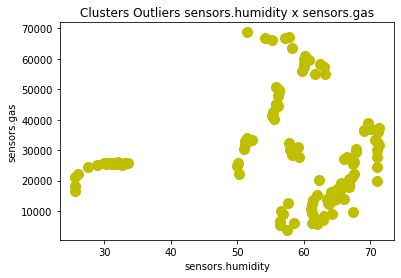

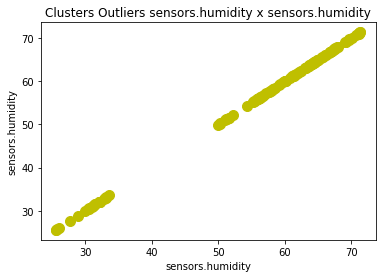

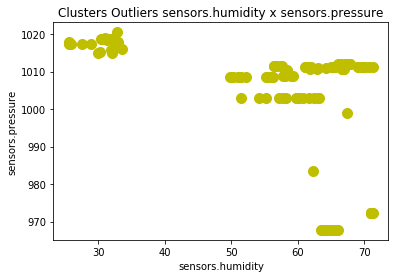

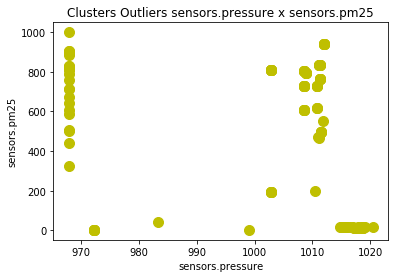

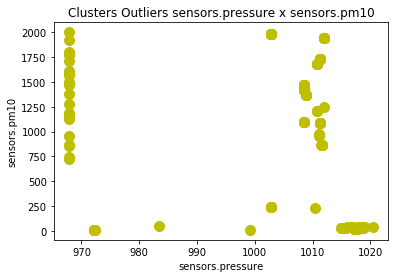

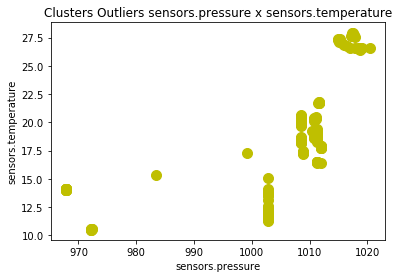

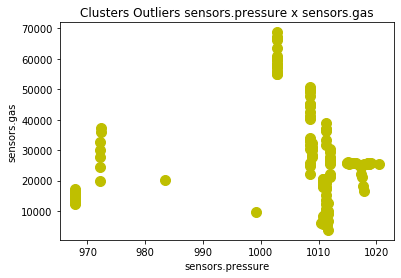

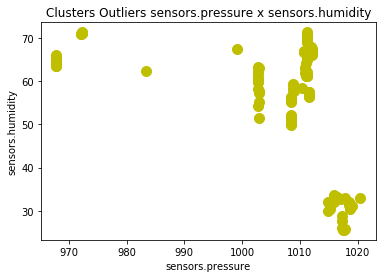

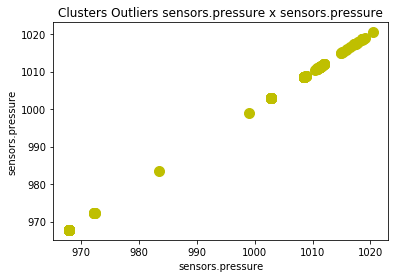

In [47]:
#Anomalias
outlier_index = np.where(y_pred_train == -1)
outlier_values = X_train.iloc[outlier_index]

print(outlier_index)

#Plot Outliers Values
for c1, col1 in enumerate(X_train.columns):
    for c2, col2 in enumerate(X_train.columns):
        plt.scatter(outlier_values[col1], outlier_values[col2], s = 100, c = 'y', label = 'Cluster Outliers')
        plt.title('Clusters Outliers ' + str(col1) + ' x ' + str(col2))
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

In [48]:
#Substituição dos valores normais e anomalias por 0 e 1
y_pred_train[y_pred_train == 1] = 0
y_pred_train[y_pred_train == -1] = 1
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1

#Métricas aplicadas aos dados de treino (X_train)
print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

#Métricas aplicadas aos dados de teste (X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy: 0.8030412744388125
[[1005   34]
 [ 238  104]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1039
           1       0.75      0.30      0.43       342

    accuracy                           0.80      1381
   macro avg       0.78      0.64      0.66      1381
weighted avg       0.79      0.80      0.77      1381

Accuracy: 0.7956081081081081
[[437  14]
 [107  34]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       451
           1       0.71      0.24      0.36       141

    accuracy                           0.80       592
   macro avg       0.76      0.61      0.62       592
weighted avg       0.78      0.80      0.75       592



#### d. Model Saving 

In [49]:
import pickle

filename = 'model_saves/isolationforest.sav'
pickle.dump(model, open(filename, 'wb'))

## 5. Model Exportation 

## 5. Conclusions and Validation
Conclusion and validations belongs to this section